# Imports
Import all modules/libraries

In [1]:
# cell for importing all modules and libraries
import pandas as pd
import math
import matplotlib.pyplot as plt

# Functions

## Create functions

1.   Write a python function that takes as input a list of data and returns the values of the first, second and
third quartiles.
2.   Write 3 separate python functions to plot a histogram, piechart, and box plot. The plotting functions
should be made as “generic” as possible so they can be reused. At a minimum they should accept the
following as inputs :

          data – where data is a numerical list of values to be plotted.
          xaxis label – string for the label of the xaxis
          yaxis label – string for the label of the yaxis
          title – string for the title of the plot

    Feel free to add any additional arguments to the function call that you think will enhance your plot.

    These 3 functions should put into your generic function library.

In [2]:
# cell for all functions
def mean(data):
    sum = 0
    for val in data:
        sum += val
    average = sum/len(data)
    return average

def median(data):
    data.sort()
    if len(data) % 2 == 0:
        middle = [data[len(data)//2 - 1], data[len(data)//2]]
        mid_avg = mean(middle)
        return mid_avg
    else:
        middle = data[len(data)//2]
        return middle
    
def quartiles(data):
    data.sort() #sorts
    second = median(data)
    second = round(second,2) #MEDIAN
    
    if second not in data: #adds median if it's not in so we can split
        data.append(second)
        data.sort()
    first = data[0:data.index(second)]
    third = data[data.index(second)+1:] # both of these have now been split to form 1&2 and 2&3 quartiles
    
    first_mid = median(first)
    first_mid = round(first_mid, 2) # same thing as before but for first half to split
    if first_mid not in first:
        first.append(first_mid)
        first.sort()
    first_quarter = first[0:first.index(first_mid)] # FIRST QUARTER
    second_quarter = first[first.index(first_mid)+1:] # SECOND QUARTER
    
    third_mid = median(third)
    third_mid = round(third_mid,2)
    if third_mid not in third:
        third.append(third_mid)
        third.sort()
    third_quarter = third[0:third.index(third_mid)] # THIRD QUARTER
    fourth_quarter = third[third.index(third_mid)+1:] # FOURTH QUARTER
    
    medians = [first_mid, second, third_mid]
    quartiles = [first_quarter, second_quarter, third_quarter, fourth_quarter]
    
    return medians, quartiles

def variance(data):
    sum = 0
    for num in data:
        sum += (num - mean(data))**2
    vari = sum/len(data)
    return vari

def stand_dev(data):
    de = math.sqrt(variance(data))
    return de
  
def elem_stats(data):
    data_stats = {"mean": mean(data), 'median':median(data), 'variance':variance(data), 'standard_deviance': stand_dev(data), "min": min(data), 'max': max(data)}
    return data_stats

def b_plot(data, title_str, x_label, y_label = None, vert=False):
    plt.boxplot(data, vert=vert)
    plt.xlabel(x_label)
    if y_label != None:
        plt.ylabel(y_label)
    plt.title(title_str)
    plt.show()
    
def histogram(data, title, x_label, y_label, edge_color='black'):
    plt.hist(data, edgecolor=edge_color)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()
    
def piechart(size, title, labels=None):
    plt.pie(size,labels=labels)
    plt.title(title)
    plt.show()
    
def data_to_list(df, index_str):
    """ df is the dataframe, index_str is the specific column being acsessed"""
    d_list = []
    for item in df[index_str]:
        d_list.append(item)
    return d_list
    
def present_web(data_source, web_index):
    """data_source is the data frame, web_index is the specific column being acsessed"""
    web_str = web_index.replace("_", " ")
    
    data_list = data_to_list(data_source, web_index)
    meds, quarts = quartiles(data_list)
    
    stats = elem_stats(data_list)
    
    b_plot(data_list, "Website " + web_str, "Minutes on Website")
    histogram(data_list, "Website "+web_str, "Minutes on Website", "Occurence")
    piechart([1,2,3,4,5], "Website " + web_str, labels=[min(data_list), meds[0], median(data_list), meds[2], max(data_list)])
    
    return meds, quarts, stats

# Get/Load data

https://github.com/bobg207/Honors_Data_Analysis/blob/master/website_times.txt

Make sure to use the URL from the **RAW** data

In [3]:
# cell for loading data
path = "../input/websites/website_times.txt"
website_df = pd.read_csv(path, delim_whitespace = True)
website_df.tail()

,Website_A,Website_B
95,29.17,34.15
96,29.55,49.52
97,26.93,43.80
98,12.06,50.96
99,23.28,52.85


# Create a simple presentation of the data

Using the above plotting functions as well as the simple statistics function you wrote for exercise 1, 

1.    Write a Python program to read in a set of data containing data on the length of time a user spends on a website. 
      
      Your program should output the following statistics for the data set 
          Mean, Median, Variance, 
          Standard Deviation, Min and Max. 
          
      Your program should also output a Boxplot, histogram and pie chart for the data.
You will be provided a data files each containing data on the length of time a user spends on a website for two different websites.

Take the outputs of your programs, i.e. the plots and statistics and, using combinations of "Text" and "Code" cells, create a presentation of your findings.

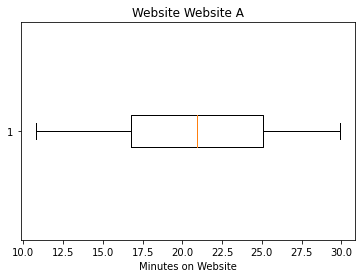

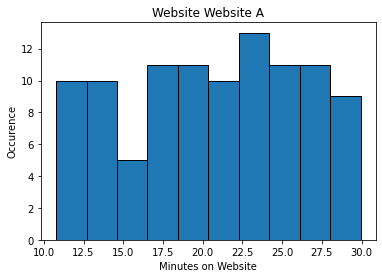

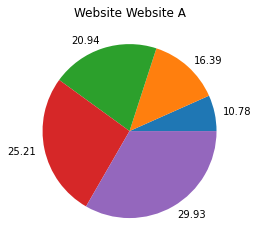

[16.39, 20.94, 25.21]
[[10.78, 10.82, 11.23, 11.37, 11.52, 11.58, 12.06, 12.12, 12.17, 12.63, 12.71, 13.23, 13.56, 13.62, 13.65, 13.67, 13.93, 14.0, 14.19, 14.38, 14.92, 15.36, 15.48, 15.57, 16.01], [16.76, 16.84, 17.0, 17.08, 17.18, 17.43, 17.75, 17.96, 18.26, 18.29, 18.31, 18.67, 18.74, 19.2, 19.35, 19.65, 19.7, 19.7, 19.84, 20.01, 20.01, 20.31, 20.63, 20.86, 20.92], [20.95, 20.95, 21.43, 21.73, 21.77, 21.81, 22.33, 22.52, 22.7, 22.93, 23.07, 23.07, 23.16, 23.28, 23.38, 23.51, 23.88, 24.03, 24.11, 24.27, 24.27, 24.32, 24.36, 24.53, 25.07], [25.35, 25.43, 25.53, 25.76, 26.05, 26.23, 26.49, 26.63, 26.75, 26.93, 26.98, 27.43, 27.6, 27.73, 27.73, 27.92, 28.04, 28.59, 28.67, 29.17, 29.49, 29.55, 29.75, 29.93, 29.93]]
{'mean': 20.683564356435642, 'median': 20.94, 'variance': 29.73545264189786, 'standard_deviance': 5.4530223401245905, 'min': 10.78, 'max': 29.93}


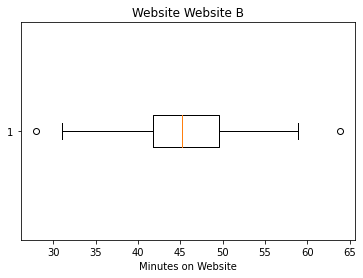

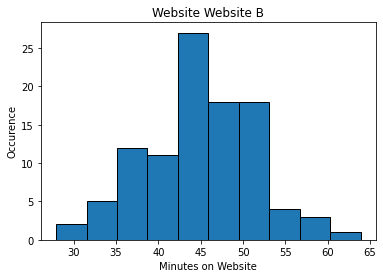

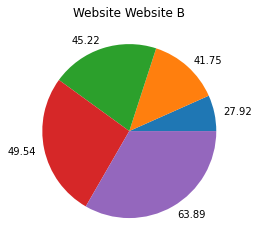

[41.75, 45.22, 49.54]
[[27.92, 30.97, 32.57, 33.54, 34.15, 34.96, 35.02, 35.23, 35.47, 35.83, 35.85, 35.89, 35.92, 36.38, 36.71, 36.91, 37.11, 37.3, 38.53, 38.96, 39.17, 41.19, 41.35, 41.54, 41.74], [41.77, 41.88, 42.08, 42.12, 42.34, 42.71, 42.94, 43.12, 43.17, 43.23, 43.8, 43.82, 43.92, 44.0, 44.03, 44.16, 44.33, 44.37, 44.38, 44.48, 44.51, 44.57, 44.83, 45.13], [45.3, 45.47, 45.51, 45.54, 45.65, 45.84, 46.54, 46.78, 47.03, 47.03, 47.08, 47.1, 47.35, 47.44, 47.56, 47.79, 47.94, 47.96, 48.07, 48.31, 48.53, 48.68, 49.05, 49.43, 49.52], [49.56, 49.93, 50.32, 50.54, 50.73, 50.76, 50.93, 50.93, 50.96, 51.09, 51.47, 51.97, 52.05, 52.29, 52.76, 52.85, 52.87, 53.3, 53.41, 55.36, 55.95, 57.26, 58.2, 58.95, 63.89]]
{'mean': 45.08613861386139, 'median': 45.22, 'variance': 42.479168258013914, 'standard_deviance': 6.5176044876943795, 'min': 27.92, 'max': 63.89}


In [4]:
mid_a, quart_a, stats_a = present_web(website_df, "Website_A")
print(f"{mid_a}\n{quart_a}\n{stats_a}")
mid_b, quart_b, stats_b = present_web(website_df, "Website_B")
print(f"{mid_b}\n{quart_b}\n{stats_b}")